In [7]:
import pandas as pd 
df = pd.read_csv(
    r"C:\Users\hp\OneDrive\Documents\projects\sales_data.csv",
    encoding="latin1"
)

df.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
df.shape


(9994, 21)

In [9]:
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [13]:
df.duplicated().sum()


np.int64(0)

In [14]:
df = df.drop_duplicates()


In [15]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.month_name()


In [16]:
df[['Sales', 'Profit']].sum()


Sales     2.297201e+06
Profit    2.863970e+05
dtype: float64

In [17]:
monthly_sales = (
    df.groupby(['Year', 'Month', 'Month_Name'])['Sales']
      .sum()
      .reset_index()
      .sort_values(['Year', 'Month'])
)
monthly_sales.head()


,Year,Month,Month_Name,Sales
0,2014,1,January,14236.895
1,2014,2,February,4519.892
2,2014,3,March,55691.009
3,2014,4,April,28295.345
4,2014,5,May,23648.287


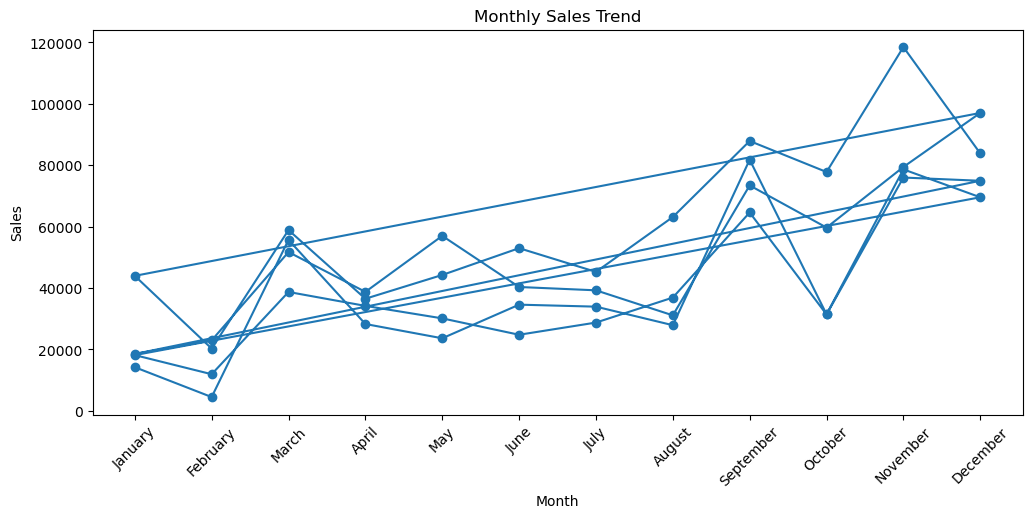

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(monthly_sales['Month_Name'], monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


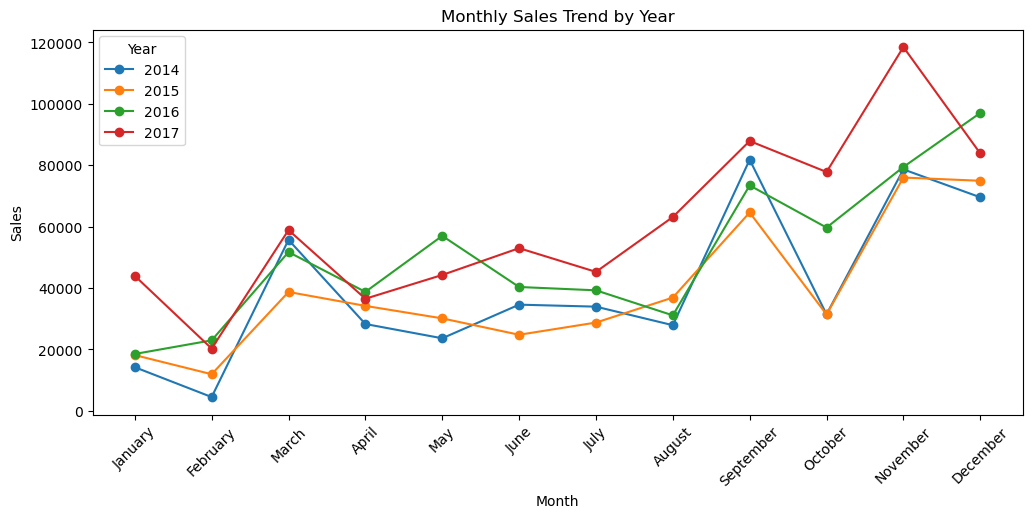

In [19]:
plt.figure(figsize=(12,5))

for year in monthly_sales['Year'].unique():
    year_data = monthly_sales[monthly_sales['Year'] == year]
    plt.plot(year_data['Month_Name'], year_data['Sales'], marker='o', label=year)

plt.title('Monthly Sales Trend by Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.show()


In [20]:
category_perf = (
    df.groupby('Category')[['Sales', 'Profit']]
      .sum()
      .reset_index()
)
category_perf


,Category,Sales,Profit
0,Furniture,741999.7953,18451.2728
1,Office Supplies,719047.0320,122490.8008
2,Technology,836154.0330,145454.9481


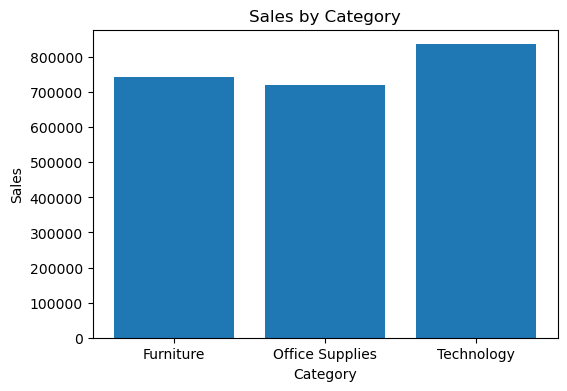

In [21]:
plt.figure(figsize=(6,4))
plt.bar(category_perf['Category'], category_perf['Sales'])
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()


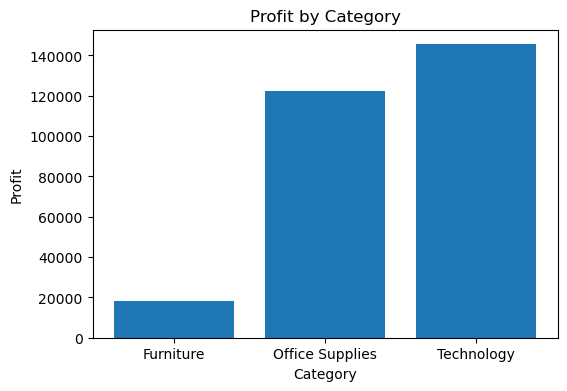

In [22]:
plt.figure(figsize=(6,4))
plt.bar(category_perf['Category'], category_perf['Profit'])
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()


In [23]:
subcat_profit = (
    df.groupby('Sub-Category')['Profit']
      .sum()
      .sort_values()
      .reset_index()
)
subcat_profit.head(10)


,Sub-Category,Profit
0,Tables,-17725.4811
1,Bookcases,-3472.5560
2,Supplies,-1189.0995
3,Fasteners,949.5182
4,Machines,3384.7569
5,Labels,5546.2540
6,Art,6527.7870
7,Envelopes,6964.1767
8,Furnishings,13059.1436
9,Appliances,18138.0054


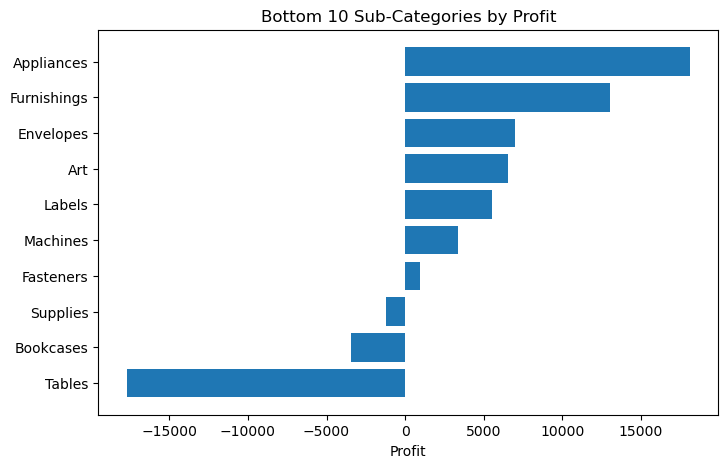

In [24]:
plt.figure(figsize=(8,5))
plt.barh(subcat_profit.head(10)['Sub-Category'],
         subcat_profit.head(10)['Profit'])
plt.title('Bottom 10 Sub-Categories by Profit')
plt.xlabel('Profit')
plt.show()


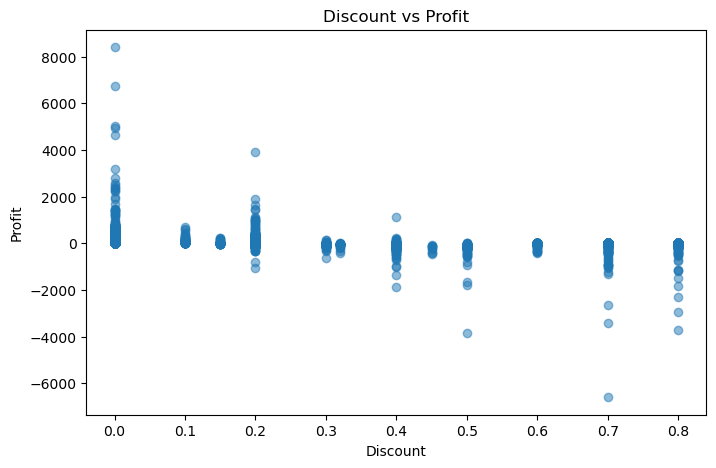

In [25]:
plt.figure(figsize=(8,5))
plt.scatter(df['Discount'], df['Profit'], alpha=0.5)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()


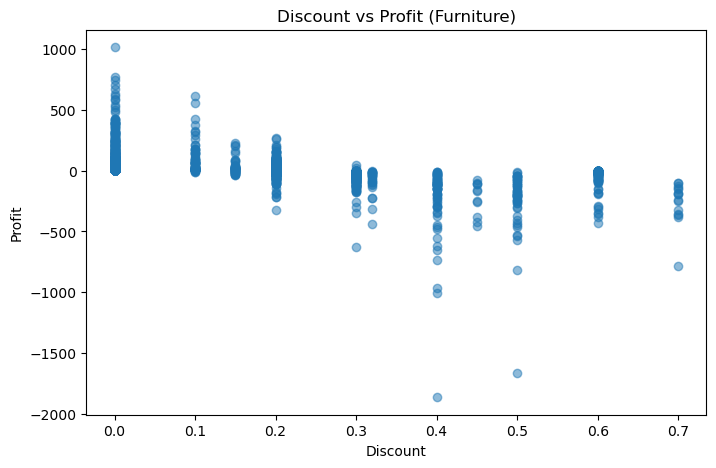

In [26]:
furniture_df = df[df['Category'] == 'Furniture']

plt.figure(figsize=(8,5))
plt.scatter(furniture_df['Discount'], furniture_df['Profit'], alpha=0.5)
plt.title('Discount vs Profit (Furniture)')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()


In [27]:
final_df = df[[
    'Order Date', 'Year', 'Month', 'Month_Name',
    'Category', 'Sub-Category', 'Region', 'Segment',
    'Sales', 'Profit', 'Discount', 'Quantity'
]]


In [28]:
final_df.to_csv("final_sales_data.csv", index=False)


In [29]:
import os
os.getcwd()


'C:\\Users\\hp'

In [30]:
final_df.to_csv(r"C:\Users\hp\Documents\Sales-Performance-Analysis\final_sales_data.csv", index=False)


OSError: Cannot save file into a non-existent directory: 'C:\Users\hp\Documents\Sales-Performance-Analysis'